# 퍼셉트론

퍼셉트론(perceptron)은 가장 오래되고 단순한 형태의 판별 함수 기반 예측 모형(discriminant function based predition model) 중 하나이다.

1962년 Rosenblatt은 동물의 신경(neuron) 구조에 기반한 퍼셉트론의 아이디어를 고안했다. 


<img src="https://datascienceschool.net/upfiles/78cccb1e0a514566916eb656c85ea397.png" style="width:70%; margin: 0 auto 0 auto;">


<img src="https://datascienceschool.net/upfiles/41974f50e89249aebe059fb4d60310aa.png" style="width:70%; margin: 0 auto 0 auto;">

In [ ]:
## 1은 오그멘테이션 x1~m은 시신경에 대한 정보 
## X 와 W는 내적을 하여 Net input fuction에 대하여 만듬 (코사인 similarity 를 확인: 내적이 90도되면 0이 됨)
## 스텝펑션 (activation function)만듬 

퍼셉트론은 입력 $x = (1, x_1, \cdots, x_m)$에 대해 1 또는 -1의 값을 가지는  $y$를 출력하는 비선형 함수이다. 1을 포함하는 입력 요소 $x_i$에 대해 가중치 $w_i$를 곱한 후 이 값이 활성화 함수 (activation function) $f(z)$를 지나면 출력 $y$가 생성된다.

$$
y = f(w^Tx)
$$

퍼셉트론은 활성화 함수로 다음과 같은 Heaviside step function 을 가진다.

$$ y = f(z) = \begin{cases} -1, & z < 0, \\ 1, & z \ge 0 \end{cases}  $$

따라서 퍼셉트론은 $w^Tx$라는 판별함수를 가지는 판별 기반 모형이다.

In [ ]:
## 스텝펑션을 넣어서 곱해줌

## 퍼셉트론 손실 함수

퍼셉트론은 독립 변수 $x$로부터 종속 변수 $y$를 예측하는 예측 모형이므로 예측 오차 즉 손실(loss)을 최소화하는 가중치를 계산해야 한다. 

일반적으로 예측 오차는 다음과 같이 손실 함수(loss function)의 합으로 나타난다.

$$
E(w) = \sum_i L(\hat{y}, y)
$$

손실 함수(loss function) 는 실제 $y$ 값과 예측 $\hat{y}$ 값의 차이를 나타내는 함수이다. 

보통은 $L(\hat{y}, y) = -(\hat{y} - y)^2 $과 같은 손실함수를 많이 사용하지만 퍼셉트론의 경우에는 다음과 같은 손실 함수를 사용한다.

$$
L(\hat{y}, y) = \max(0,-\hat{y}y)
$$

$$
E(w) = \sum_i \max(0,-\hat{y}y) = \sum_i \max(0,-w^Tx_i y_i)
$$

이를 퍼셉트론 손실 함수(perceptron loss function)이라고 한다.



In [ ]:
## 트레이닝 데이터와 실제값데이터의 차이 손실 loss를 줄이는것이 목표 
## 원래는 residual 을 줄이는 손실 함수의 목표이나 여기에서는 0과 예측값과 실제값의 곱에서 제일 크게 차이나는 W를 찾는것이 목표이다 

## 가중치 계산

$E(w)$를 최소화하는 $w$를 찾기 위해 $E(w)$를 $w$로 미분하여 gradient를 구하면 다음과 같다.

$$
\dfrac{dE}{dw} = - \sum_i x_i y_i
$$


gradient descent 방법을 사용하면 다음과 같이 $w$를 구할 수 있다.


$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i=1}^N x_i y_i \\
\end{eqnarray}
$$

여기에서 $\eta$는 step size 또는 learning rate 이라고 부른다.


## SGD (Stochastic Gradient Descent)

퍼셉트론은 일반적인 gradient descent 방법이 아닌 SGD(Stochastic Gradient Descent) 최적화 방법을 사용한다.

SGD 최적화 방법은 정확한 gradient 인 $\dfrac{dE}{dw} = - \sum_i x_i y_i$ 대신 일부 표본 데이터만 사용한 gradient의 추정치를 이용하는 방법이다.  gradient 추정에 사용하는 표본 데이터의 갯수를 minibatch size 라고 하는데 가장 퍼셉트론은 가장 극단적인 경우로 minibatch size = 1 을 사용한다. 즉, 한번에 하나의 표본 데이터만을 이용하여 가중치를 조정한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k  x_i y_i \\
\end{eqnarray}
$$

이 식에서 $i$는 매 회 임의의 표본을 선택한다.

In [ ]:
## 표본이 빠져도 퍼셉트론은 가능 표본의 일부만 사용하여 스텝을 사용하여 최소화된 지점을 찾아감 

## Scikit-Learn 의 퍼셉트론 구현

Scikit-Learn 에서는 두 가지의 퍼셉트론 클래스를 제공한다. 단순한 퍼셉트론 모형인 `Perceptron` 클래스와 좀 더 다양한 옵션 인수를 제공하는 `SGDClassifier` 클래스이다.

`SGDClassifier` 클래스에서 제공하는 인수 중 일부를 소개하면 다음과 같다.

* `loss` : ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’,  ‘squared_epsilon_insensitive’
 * 손실 함수 

* `penalty` : ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
 * 정규화 조건

* `alpha`, `l1_ratio`
 * 정규화 가중치
 
* `max_iter` : 
 * 최적화를 위한 반복 횟수

* `eta0` : 
 * learning rate $\eta$

In [1]:
from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


## Perceptron 실행 예

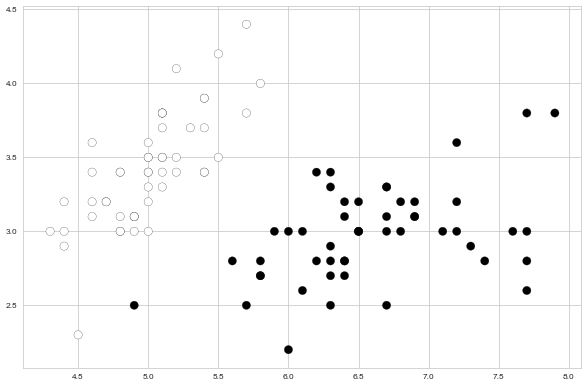

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [35]:
from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)##n_iter=n
    model = Perceptron(n_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


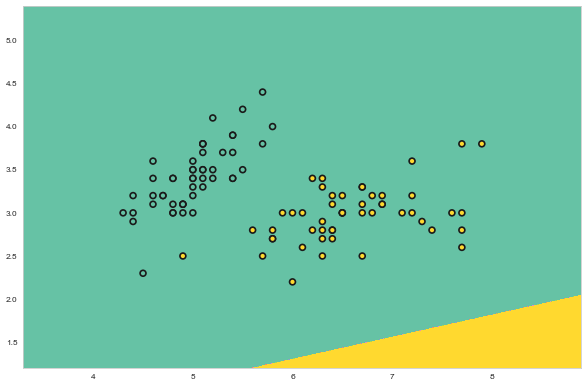

In [38]:
plot_perceptron(1)

In [44]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

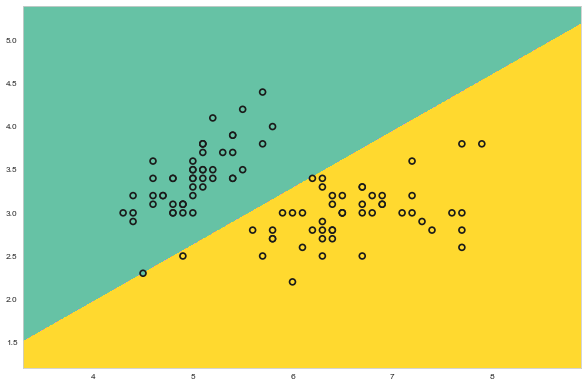

In [45]:
plot_perceptron(500)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(n_iter=500, eta0=0.1, random_state=1).fit(X, y)

In [21]:
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

## SGDClassifier 실행 예  

In [41]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = SGDClassifier(loss="hinge", n_iter=n, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', linewidth=2, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)    
    plt.grid(False)
    plt.show()

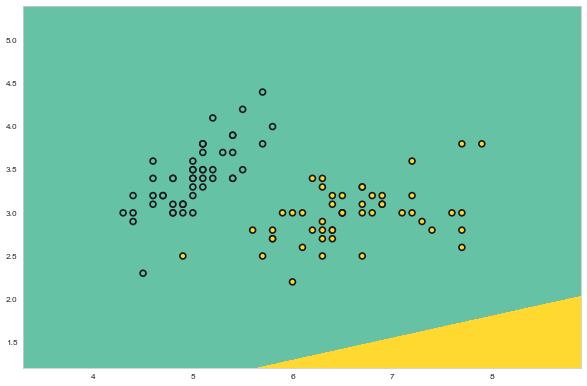

In [42]:
plot_sgd(1)

In [46]:
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

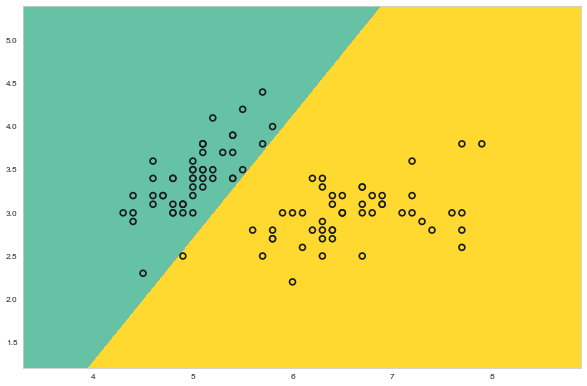

In [47]:
plot_sgd(1000)